# MO443 - Introdução ao Processamento de imagem digital | Trabalho 01

In [1]:
#Importando as bibliotecas que são usadas ao longo do trabalho
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#índices
r = 2
g = 1
b = 0

## Exercício 1.1a:

Este primeiro exercício está pautado na manipulação dos três canais de cor de uma imagem. Para a primeira letra, a imagem resultante tem como cada um dos seus canais uma associação dos canais da imagem original, poderados por diferentes pesos definidos previamente. Isso pode ser solucionado facilmente por um slicing da imagem original recebendo todos os pixels de um certo canal e multiplicando-os com uma multiplicação elemento-a-elemento, isso segue então por uma soma do mesmo feito para os outros dois canais.



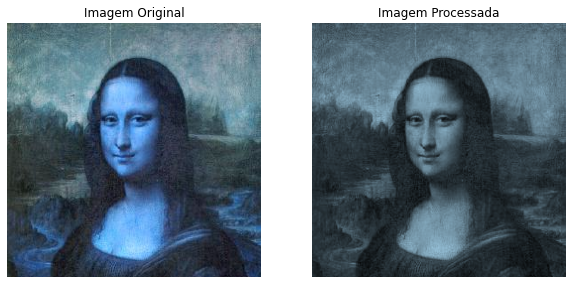

In [2]:
#Carregando a imagem
#imagem = np.zeros([128,128,3])

nomeArquivo = "monalisa.png"
imagem = cv.imread(nomeArquivo)
imagemProcessada = np.ones_like(imagem)

cv.imshow('image',imagem)
cv.waitKey(0)
cv.destroyAllWindows()

#Processando a figura, usando composições das três cores. É interessante observar que o operador +, para ndarray, é o mesmo que np.add().
imagemProcessada[:,:,r] = np.multiply(imagem[:,:,r], 0.0393) + np.multiply(imagem[:,:,g], 0.769) + np.multiply(imagem[:,:,b], 0.189)
imagemProcessada[:,:,g] = np.multiply(imagem[:,:,r], 0.0349) + np.multiply(imagem[:,:,g], 0.686) + np.multiply(imagem[:,:,b], 0.168)
imagemProcessada[:,:,b] = np.multiply(imagem[:,:,r], 0.0272) + np.multiply(imagem[:,:,g], 0.534) + np.multiply(imagem[:,:,b], 0.131)

#Definindo um limite superior para os valores da imagem processada
imagemProcessada[imagemProcessada > 255] = 255

#Mostrando a imagem
plt.figure(figsize=(10,10))


plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.axis("off")
plt.imshow(imagem)


plt.subplot(1,2,2)
plt.title("Imagem Processada")
plt.axis("off")
plt.imshow(imagemProcessada)

plt.show()

#Salvando a imagem processada


## Exercício 1.1b:

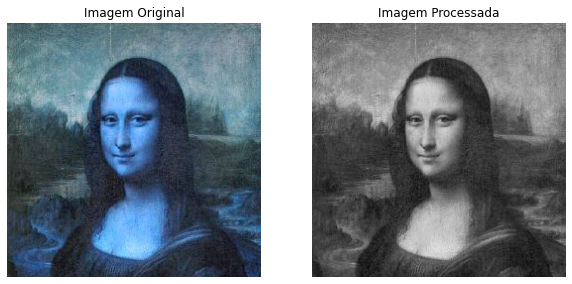

In [3]:
#Carregando a imagem e criando uma imagem de mesma forma porém com um só canal.
#imagem = cv.imread("monalisa.png")
#imagem = np.zeros([128,128,3])
imagemProcessada = np.zeros_like(imagem)

#Convertendo a imagem para escala de cinza
imagemProcessada[:,:,r] = (np.multiply(imagem[:,:,r], 0.2989) + np.multiply(imagem[:,:,g], 0.5870) + np.multiply(imagem[:,:,b], 0.1140))
imagemProcessada[:,:,g] = (np.multiply(imagem[:,:,r], 0.2989) + np.multiply(imagem[:,:,g], 0.5870) + np.multiply(imagem[:,:,b], 0.1140))
imagemProcessada[:,:,b] = (np.multiply(imagem[:,:,r], 0.2989) + np.multiply(imagem[:,:,g], 0.5870) + np.multiply(imagem[:,:,b], 0.1140))

#Mostrando a imagem
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("Imagem Original")
plt.axis("off")
plt.imshow(imagem)

plt.subplot(1,2,2)
plt.title("Imagem Processada")
plt.axis("off")
plt.imshow(imagemProcessada)

plt.show()



## Exercício 1.2:

In [4]:
#Iniciando as matrizes dos filtros

h1 = np.array([[-1,  0,  1], [-2, 0, 2], [-1, 0, 1]])

h2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

h12 = np.sqrt(np.add(np.power(h1,2), np.power(h2,2)))

h3 = np.full([3, 3],-1)
h3[1,1] = 8;

h4 = np.ones([3,3])/9

h5 = np.full([3,3], -1)
np.fill_diagonal(h5,2)

h6 = h5
h5 = np.fliplr(h5)

h7 = np.zeros([3,3])
h7[0,2] = 1
h7[2,0] = 1

h8 = 0

h9 = np.array([1, 4, 6, 4, 1])
aux = np.full([5,5],1)
aux = np.multiply(aux,h9)
h9 = np.multiply(aux.T,h9)/256

In [11]:
imagem2 = np.zeros_like(imagem)
imagem2[:,:,r] = conv2d(imagem[:,:,0], h1)
imagem2[:,:,g] = conv2d(imagem[:,:,0], h1)
imagem2[:,:,b] = conv2d(imagem[:,:,0], h1)
cv.imshow('image',conv2d(imagem[:,:,0], h1))
cv.waitKey(0)
cv.destroyAllWindows()

ValueError: could not broadcast input array from shape (254,254) into shape (256,256)

In [13]:
imagem_h1  = cv.filter2D(imagem, -1, h1)
imagem_h2  = cv.filter2D(imagem, -1, h2)
imagem_h12 = cv.filter2D(imagem, -1, h12)
imagem_h3  = cv.filter2D(imagem, -1, h3)
imagem_h4  = cv.filter2D(imagem, -1, h4)
imagem_h5  = cv.filter2D(imagem, -1, h5)
imagem_h6  = cv.filter2D(imagem, -1, h6)
imagem_h7  = cv.filter2D(imagem, -1, h7)
imagem_h8  = cv.filter2D(imagem, -1, h8)
imagem_h9  = cv.filter2D(imagem, -1, h9)



In [ ]:
def convoluciona(imagem, kernel):
    #Adicionando uma borda de modo a 
    tamanhoBorda = int(kernel.shape[0]/2);
    imagemBorda = np.zeros([imagem.shape[0]+tamanhoBorda,imagem.shape[1]+ tamanhoBorda])
    imagemBorda[tamanhoBorda:][tamanhoBorda:] = imagem

    cv.imshow('image',imagem)



In [6]:
def conv2d(a, f):
    s = f.shape + tuple(np.subtract(a.shape, f.shape) + 1)
    strd = np.lib.stride_tricks.as_strided
    subM = strd(a, shape = s, strides = a.strides * 2)
    return np.einsum('ij,ijkl->kl', f, subM)

In [ ]:
a = np.ones([10, 10])
b = np.ones([4,4])

conv2d(a,b)
